In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [3]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt
from sklearn import decomposition
from session.sessions import selected_009266, selected_008229, selected_009265

%matplotlib inline

In [4]:
sessions = [s for s in selected_009266.keys()]
sessions.sort()
sessions[:2]

['009266_hippoSIT_2023-04-17_17-04-17', '009266_hippoSIT_2023-04-18_10-10-37']

In [22]:
dst_path = "/home/sobolev/nevermind/AG_Pecka/data/processed/"
session  = sessions[1]
animal   = session.split('_')[0]
meta_file  = os.path.join(dst_path, animal, session, 'meta.h5')
units_file = os.path.join(dst_path, animal, session, 'units.h5')
aeps_file = os.path.join(dst_path, animal, session, 'AEPs.h5')

In [23]:
area = 'A1'

with h5py.File(meta_file, 'r') as f:
    sound_events = np.array(f['processed']['sound_events'])
    tgt_mx       = np.array(f['processed']['target_matrix'])
    tl           = np.array(f['processed']['timeline'])
    
with h5py.File(aeps_file, 'r') as f:
    name = [x for x in f[area]][0]
    aeps = np.array(f[area][name])
    
aeps.shape

(9599, 250)

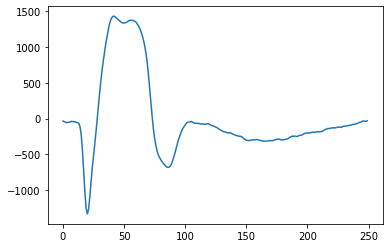

In [28]:
plt.plot(aeps[sound_events[:, 1] == 1].mean(axis=0))

In [25]:
from sklearn import decomposition

# select BGR only
fet_matrix = aeps[sound_events[:, 1] == 1]

pca = decomposition.PCA(n_components=3)
pca.fit(fet_matrix)
X = pca.transform(fet_matrix)
# try normalized / not

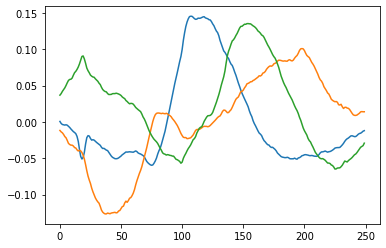

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(pca.components_[0])
ax.plot(pca.components_[1])
ax.plot(pca.components_[2])
#for key, value in AEP_metrics_lims.items():
#    ax.axvline(value[0], color='black', ls='--')
#    ax.axvline(value[1], color='black', ls='--')

Text(0, 0.5, 'Variance Explained')

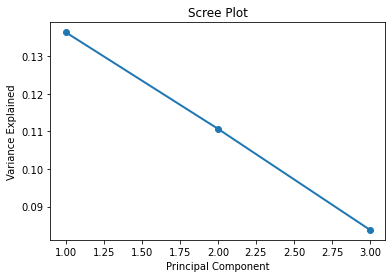

In [27]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

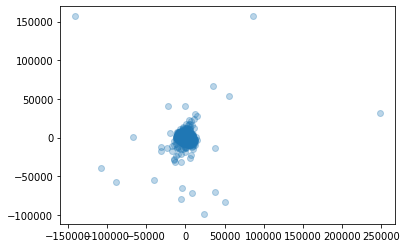

In [15]:
fig, ax = plt.subplots(1, 1)
#_ = ax.hist2d(X[:, 1], X[:, 2], bins=30)
_ = ax.scatter(X[:, 0], X[:, 1], alpha=0.3)

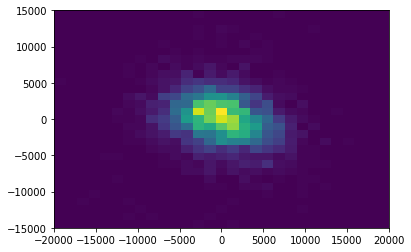

In [14]:
fig, ax = plt.subplots(1, 1)
_ = ax.hist2d(X[:, 0], X[:, 1], bins=[np.linspace(-20000, 20000, 30), np.linspace(-15000, 15000, 30)])